In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.impute import SimpleImputer
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

In [5]:
df = pd.read_csv("/content/drive/MyDrive/innotech taskphase 2/wdbc.data")

columns = ["ID", "Diagnosis"] + [f"feature_{i}" for i in range(1,31)]
df.columns = columns
df.drop("ID", axis=1, inplace=True)

# Converting labels (M=1 malignant, B=0 benign)
df["Diagnosis"] = df["Diagnosis"].map({"M":1, "B":0})
print("Missing values:\n", df.isnull().sum())
df = df.dropna()
print(df.head())


Missing values:
 Diagnosis     0
feature_1     0
feature_2     0
feature_3     0
feature_4     0
feature_5     0
feature_6     0
feature_7     0
feature_8     0
feature_9     0
feature_10    0
feature_11    0
feature_12    0
feature_13    0
feature_14    0
feature_15    0
feature_16    0
feature_17    0
feature_18    0
feature_19    0
feature_20    0
feature_21    0
feature_22    0
feature_23    0
feature_24    0
feature_25    0
feature_26    0
feature_27    0
feature_28    0
feature_29    0
feature_30    0
dtype: int64
   Diagnosis  feature_1  feature_2  feature_3  feature_4  feature_5  \
0          1      20.57      17.77     132.90     1326.0    0.08474   
1          1      19.69      21.25     130.00     1203.0    0.10960   
2          1      11.42      20.38      77.58      386.1    0.14250   
3          1      20.29      14.34     135.10     1297.0    0.10030   
4          1      12.45      15.70      82.57      477.1    0.12780   

   feature_6  feature_7  feature_8  feature_9  

In [6]:
from sklearn.model_selection import train_test_split

X = df.drop("Diagnosis", axis=1)
y = df["Diagnosis"]

X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    stratify=y,
    random_state=42
)



In [7]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


In [8]:
from sklearn.model_selection import StratifiedKFold

cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)


In [32]:
#Logistic Regression
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV

log_params = {
    "C":[0.01, 0.1, 1, 10],
    "penalty":["l2"],
    "solver":["lbfgs"]
}

log_grid = GridSearchCV(LogisticRegression(max_iter=500),
                        log_params,
                        cv=cv,
                        scoring="f1")

log_grid.fit(X_train, y_train)

print("Best Logistic:", log_grid.best_params_)
best_log = log_grid.best_estimator_


Best Logistic: {'C': 0.1, 'penalty': 'l2', 'solver': 'lbfgs'}


In [33]:
#SVM
from sklearn.svm import SVC

svm_params = {
    "C":[0.1,1,10],
    "kernel":["linear","rbf"],
    "gamma":["scale","auto"]
}

svm_grid = GridSearchCV(SVC(),
                        svm_params,
                        cv=cv,
                        scoring="f1")

svm_grid.fit(X_train, y_train)

print("Best SVM:", svm_grid.best_params_)
best_svm = svm_grid.best_estimator_


Best SVM: {'C': 1, 'gamma': 'scale', 'kernel': 'rbf'}


In [34]:
#Random forest
from sklearn.ensemble import RandomForestClassifier

rf_params = {
    "n_estimators":[100,200],
    "max_depth":[None,5,10],
    "min_samples_split":[2,5]
}

rf_grid = GridSearchCV(RandomForestClassifier(random_state=42),
                       rf_params,
                       cv=cv,
                       scoring="f1")

rf_grid.fit(X_train, y_train)

print("Best Random Forest:", rf_grid.best_params_)
best_rf = rf_grid.best_estimator_


Best Random Forest: {'max_depth': 5, 'min_samples_split': 2, 'n_estimators': 100}


In [35]:
from sklearn.tree import DecisionTreeClassifier

dt_params = {
    "max_depth":[2,3,5,10,None],
    "min_samples_split":[2,5,10]
}

dt_grid = GridSearchCV(DecisionTreeClassifier(random_state=42),
                       dt_params,
                       cv=cv,
                       scoring="f1")

dt_grid.fit(X_train, y_train)

print("Best Decision Tree:", dt_grid.best_params_)
best_dt = dt_grid.best_estimator_


Best Decision Tree: {'max_depth': 5, 'min_samples_split': 2}


In [36]:
from sklearn.metrics import precision_score, recall_score, f1_score, confusion_matrix

def evaluate_model(name, model):
    y_pred = model.predict(X_test)

    print(f"\n{name}")
    print("Precision:", precision_score(y_test, y_pred))
    print("Recall:", recall_score(y_test, y_pred))
    print("F1 Score:", f1_score(y_test, y_pred))
    print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))


In [37]:
evaluate_model("Logistic Regression", best_log)
evaluate_model("SVM", best_svm)
evaluate_model("Decision Tree", best_dt)
evaluate_model("Random Forest", best_rf)



Logistic Regression
Precision: 1.0
Recall: 0.9761904761904762
F1 Score: 0.9879518072289156
Confusion Matrix:
 [[72  0]
 [ 1 41]]

SVM
Precision: 1.0
Recall: 0.9761904761904762
F1 Score: 0.9879518072289156
Confusion Matrix:
 [[72  0]
 [ 1 41]]

Decision Tree
Precision: 0.975
Recall: 0.9285714285714286
F1 Score: 0.9512195121951219
Confusion Matrix:
 [[71  1]
 [ 3 39]]

Random Forest
Precision: 0.9761904761904762
Recall: 0.9761904761904762
F1 Score: 0.9761904761904762
Confusion Matrix:
 [[71  1]
 [ 1 41]]


In [38]:
models = {
    "Logistic": best_log,
    "SVM": best_svm,
    "DecisionTree": best_dt,
    "RandomForest": best_rf
}

results = []

for name, model in models.items():
    y_pred = model.predict(X_test)
    results.append([
        name,
        precision_score(y_test,y_pred),
        recall_score(y_test,y_pred),
        f1_score(y_test,y_pred)
    ])

results_df = pd.DataFrame(results, columns=["Model","Precision","Recall","F1 Score"])
print(results_df.sort_values("F1 Score", ascending=False))


          Model  Precision    Recall  F1 Score
0      Logistic    1.00000  0.976190  0.987952
1           SVM    1.00000  0.976190  0.987952
3  RandomForest    0.97619  0.976190  0.976190
2  DecisionTree    0.97500  0.928571  0.951220


In [39]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.decomposition import PCA

# Apply PCA to the scaled training and testing data
pca = PCA(n_components=0.95) # Retain 95% of variance
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)

# Logistic Regression
log_pca = LogisticRegression(max_iter=500).fit(X_train_pca, y_train)

# SVM
svm_pca = SVC(kernel="rbf", C=1, gamma="scale").fit(X_train_pca, y_train)

# Decision Trees
dt_shallow = DecisionTreeClassifier(max_depth=2).fit(X_train_pca, y_train)
dt_deep = DecisionTreeClassifier(max_depth=10).fit(X_train_pca, y_train)

# Random Forest
rf_pca = RandomForestClassifier(n_estimators=100, random_state=42).fit(X_train_pca, y_train)


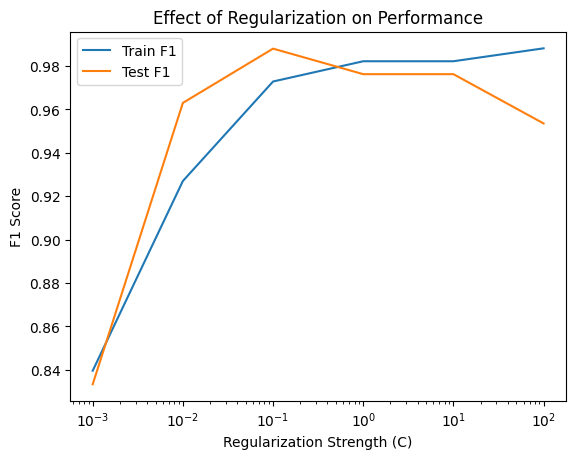

In [40]:
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import f1_score

C_values = [0.001, 0.01, 0.1, 1, 10, 100]

train_scores = []
test_scores = []

for c in C_values:
    model = LogisticRegression(C=c, max_iter=500)
    model.fit(X_train, y_train)

    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)

    train_scores.append(f1_score(y_train, y_train_pred))
    test_scores.append(f1_score(y_test, y_test_pred))

plt.figure()
plt.plot(C_values, train_scores, label="Train F1")
plt.plot(C_values, test_scores, label="Test F1")
plt.xscale("log")
plt.xlabel("Regularization Strength (C)")
plt.ylabel("F1 Score")
plt.title("Effect of Regularization on Performance")
plt.legend()
plt.show()


In [41]:
import pandas as pd
from sklearn.metrics import precision_score, recall_score, f1_score, confusion_matrix

def metrics(model):
    y_pred = model.predict(X_test)
    return [
        precision_score(y_test,y_pred),
        recall_score(y_test,y_pred),
        f1_score(y_test,y_pred)
    ]

results = pd.DataFrame({
    "Model":["Logistic","SVM","DecisionTree","RandomForest"],
    "Precision":[*metrics(best_log)[0:1],*metrics(best_svm)[0:1],*metrics(best_dt)[0:1],*metrics(best_rf)[0:1]],
    "Recall":[metrics(best_log)[1],metrics(best_svm)[1],metrics(best_dt)[1],metrics(best_rf)[1]],
    "F1":[metrics(best_log)[2],metrics(best_svm)[2],metrics(best_dt)[2],metrics(best_rf)[2]]
})

print(results.sort_values("F1",ascending=False))


          Model  Precision    Recall        F1
0      Logistic    1.00000  0.976190  0.987952
1           SVM    1.00000  0.976190  0.987952
3  RandomForest    0.97619  0.976190  0.976190
2  DecisionTree    0.97500  0.928571  0.951220


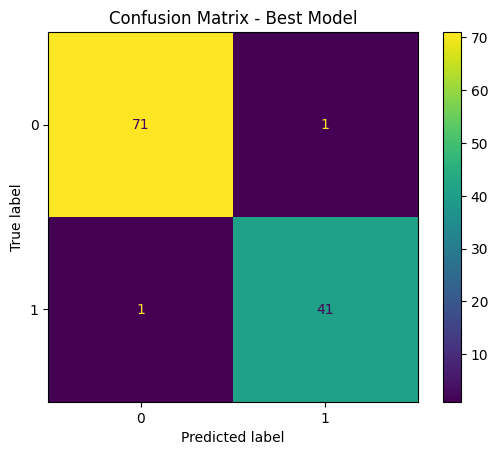

In [42]:
from sklearn.metrics import ConfusionMatrixDisplay

ConfusionMatrixDisplay.from_estimator(best_rf, X_test, y_test)
plt.title("Confusion Matrix - Best Model")
plt.show()


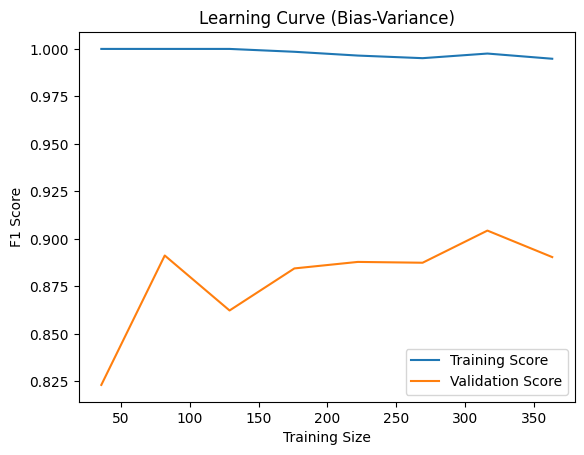

In [43]:
from sklearn.model_selection import learning_curve
import numpy as np

train_sizes, train_scores, test_scores = learning_curve(
    best_dt, X_train, y_train,
    cv=5,
    scoring="f1",
    train_sizes=np.linspace(0.1,1.0,8)
)

train_mean = train_scores.mean(axis=1)
test_mean = test_scores.mean(axis=1)

plt.figure()
plt.plot(train_sizes, train_mean, label="Training Score")
plt.plot(train_sizes, test_mean, label="Validation Score")
plt.xlabel("Training Size")
plt.ylabel("F1 Score")
plt.title("Learning Curve (Bias-Variance)")
plt.legend()
plt.show()


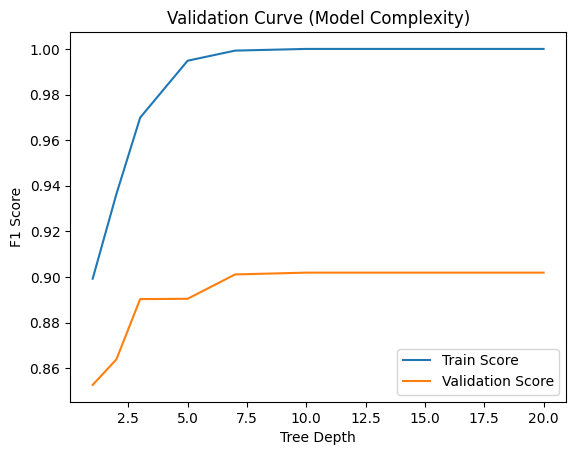

In [44]:
from sklearn.model_selection import validation_curve

depth_range = [1,2,3,5,7,10,15,20]

train_scores, test_scores = validation_curve(
    best_dt,
    X_train, y_train,
    param_name="max_depth",
    param_range=depth_range,
    cv=5,
    scoring="f1"
)

train_mean = train_scores.mean(axis=1)
test_mean = test_scores.mean(axis=1)

plt.figure()
plt.plot(depth_range, train_mean, label="Train Score")
plt.plot(depth_range, test_mean, label="Validation Score")
plt.xlabel("Tree Depth")
plt.ylabel("F1 Score")
plt.title("Validation Curve (Model Complexity)")
plt.legend()
plt.show()


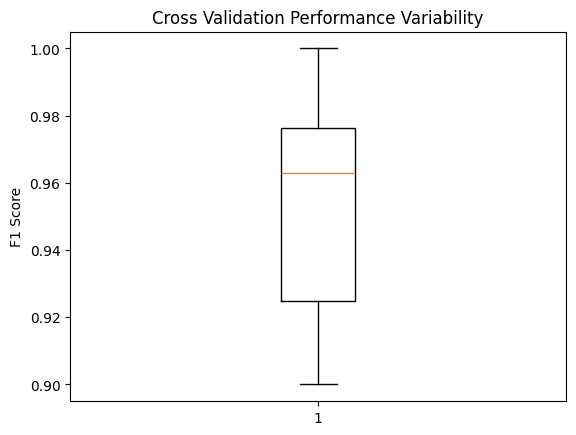

Mean CV Score: 0.9509050957235872
Std Dev: 0.03377275157037012


In [45]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(best_rf, X, y, cv=10, scoring="f1")

plt.figure()
plt.boxplot(scores)
plt.title("Cross Validation Performance Variability")
plt.ylabel("F1 Score")
plt.show()

print("Mean CV Score:", scores.mean())
print("Std Dev:", scores.std())
